In [1]:
import statsmodels.api as sm

In [2]:
import pandas as pd
import numpy as np

In [3]:
from statsmodels.distributions.empirical_distribution import ECDF

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
data = sm.datasets.ccard.load_pandas()

В statsmodels переменные делятся на 2 части: экзогенные и эндогенные. Мы рассмотрим встроенный набор данных по кредитному скорингу.

In [7]:
data.exog.columns

Index([u'AGE', u'INCOME', u'INCOMESQ', u'OWNRENT'], dtype='object')

In [8]:
data.endog.name

'AVGEXP'

Рассмотрим выборочные оценки по переменной 'INCOME'.

In [9]:
income = data.exog['INCOME']

In [10]:
income.count()

72

В терминах, введенных ранее, мы наблюдаем реализацию iid, подчиняющихся одному закону распределеня $F_x$.

### Эмпирическая функция распределения

**Эмпирическая функция распределения** - функция, которая апроксиммирует истинное распределение выборочным аналогом.

$$\hat{F}_n (x) = \frac{1}{n} \sum_{i=1}^{n} I(x_i \leq x).$$

Свойства оценки: 
* несмещенность - $E(\hat{F}_n (x)) = F(x)$. Заметить это легко - для фиксированного $x$ $I(x_i \leq x)$ имеет распределение Бернулли с вероятностью успеха F(x);
* $V(\hat{F}_n (x)) = \frac{F(x)(1-F(x))}{n}$;
* Согласно теореме Гливенко-Кантелли, оценка является состоятельной.

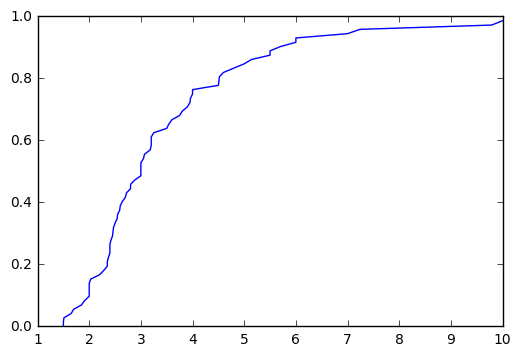

In [11]:
sorted_income = np.sort(income)
yvals=np.arange(len(sorted_income))/float(len(sorted_income))
plt.plot(sorted_income,yvals)
plt.show()

Или, что обычно предпочтительнее, можно использовать готовую функцию из пакета statsmodels.

In [12]:
ecdf = ECDF(income)

### Выборочное среднее

Формула следует из названия:
$$ \bar{X}_n = \frac{1}{n} \sum_{i=1}^{n} X_i.$$

Свойства оценки: 
* несмещенность - $E(\bar{X}_n) = \mu$. Заметить это легко - в силу линейности математического ожидания;
* $V(\bar{X}_n) = n\sigma^2$;
* $se(\bar{X}_n) = \frac{\sigma}{n}$.

In [13]:
np.mean(income)

3.4370833333333333

Полезно вспомнить центральную предельную теорему. 
При расчете стандартной ошибки были использованы теоретические значения стандартного отклонения. Их можно заменить на несмещенные оценки при расчете стандартных ошибок.

### Выборочная дисперсия

Среднеквадратичное отклонение точек в выборочной совокупности от среднего. Данная оценка является смещенной:

$$ \hat{\sigma}_{biased}^2 = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X}_n)^2.$$

Найти источник смещения нетрудно - 

$$E(\sigma^2 - \hat{\sigma}_{biased}^2 ) = \frac{\sigma}{n},$$
(сравните со стандартной ошибкой среднего),

впрочем, как и получить несмещенную оценку:

$$ 
^2 = \frac{n}{n-1} \hat{\sigma}_{biased}^2 =\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X}_n)^2.$$

Данная поправка известна как корректировка Бесселя. Оценка является состоятельной.

Строго говоря, выборочное стандартное отклонение является смещенной оценкой. На практике, это не ведет к осложнениям.

In [14]:
np.std(income)

1.6876087927893715

### Статистический функционал

Под статистическим функционалом будем понимать любую функцию от $F$. Выборочной оценкой истинного параметра $\theta = T(F)$ является $\hat{\theta} = T(\hat{F})$.

В таком смысле все оценки все оценки, которые мы рассмотрели выше, являются оценками статистического функционала. Таким же способом можно получить оценки моментов более высоких порядков, а также выборочные квантили.

In [15]:
income.describe()

count    72.000000
mean      3.437083
std       1.699452
min       1.500000
25%       2.400000
50%       3.000000
75%       3.970000
max      10.000000
Name: INCOME, dtype: float64

In [16]:
income.quantile(0.75) - income.quantile(0.25)

1.5699999999999998

In [17]:
data.exog.describe()

,AGE,INCOME,INCOMESQ,OWNRENT
count,72.000000,72.000000,72.000000,72.00000
mean,31.277778,3.437083,14.661565,0.37500
std,7.152705,1.699452,17.644929,0.48752
min,20.000000,1.500000,2.250000,0.00000
25%,26.000000,2.400000,5.760000,0.00000
50%,30.000000,3.000000,9.000000,0.00000
75%,36.000000,3.970000,15.761200,1.00000
max,55.000000,10.000000,100.000000,1.00000
